# Write a program to implement Simple Linear Regression using a dataset of your choice from sklearn.

Predicted values  [3.83 4.03 3.51]
Real values       [5.1 4.  1.4]
Trained W         1.04
Trained b         -2.21


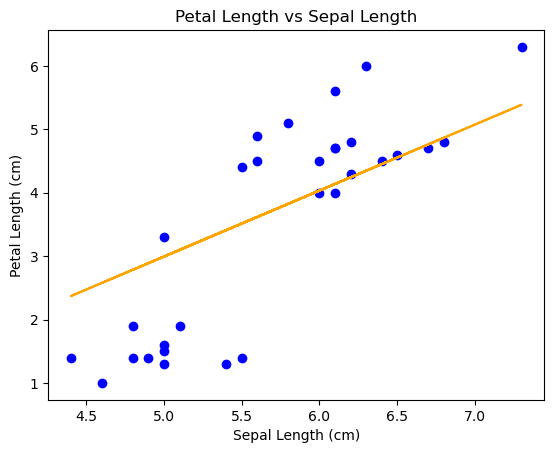

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Linear Regression
class LinearRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.iterations):
            self.update_weights()
        
        return self
    
    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = - (2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = - 2 * np.sum(self.Y - Y_pred) / self.m
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
    
    def predict(self, X):
        return X.dot(self.W) + self.b

# Importing Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Selecting sepal length as the independent variable and petal length as the dependent variable
X = data['sepal length (cm)'].values.reshape(-1, 1)
Y = data['petal length (cm)'].values

# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Model training
model = LinearRegression(iterations=1000, learning_rate=0.01)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Predicted values ", np.round(Y_pred[:3], 2))
print("Real values      ", Y_test[:3])
print("Trained W        ", round(model.W[0], 2))
print("Trained b        ", round(model.b, 2))

# Visualization on the test set
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, Y_pred, color='orange')
plt.title('Petal Length vs Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()
